In [ ]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [ ]:
print(os.path.exists("/content/drive/MyDrive/SS/laptop_price.csv"))

True


In [ ]:
ds = pd.read_csv("/content/drive/MyDrive/SS/laptop_price.csv", encoding='cp1251')

In [ ]:
display(ds.head(5))

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
# Перейменувати колонку Ram на Ram(GB)
ds = ds.rename(columns={'Ram': 'Ram(GB)'})

# Замінити значення в колонці Ram(GB) на числове значення без тексту "GB"
ds['Ram(GB)'] = ds['Ram(GB)'].str.replace('GB', '').astype(int)

# Перейменувати колонку Weight на Weight(kg)
ds = ds.rename(columns={'Weight': 'Weight(kg)'})

# Замінити значення в колонці Weight(kg) на числове значення без тексту "kg"
ds['Weight(kg)'] = ds['Weight(kg)'].str.replace('kg', '').astype(float)

In [ ]:
display(ds.head(5))

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [ ]:
print("Any missing sample in training set:",ds.isnull().values.any())

Any missing sample in training set: False


In [ ]:
ds.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram(GB)                9
Memory                39
Gpu                  110
OpSys                  9
Weight(kg)           171
Price_euros          791
dtype: int64

In [ ]:
ds.describe()

,laptop_ID,Inches,Ram(GB),Weight(kg),Price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,8.382195,2.038734,1123.686992
std,381.172104,1.426304,5.084665,0.665475,699.009043
min,1.000000,10.100000,2.000000,0.690000,174.000000
25%,331.500000,14.000000,4.000000,1.500000,599.000000
50%,659.000000,15.600000,8.000000,2.040000,977.000000
75%,990.500000,15.600000,8.000000,2.300000,1487.880000
max,1320.000000,18.400000,64.000000,4.700000,6099.000000


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram(GB)           1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight(kg)        1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 132.5+ KB


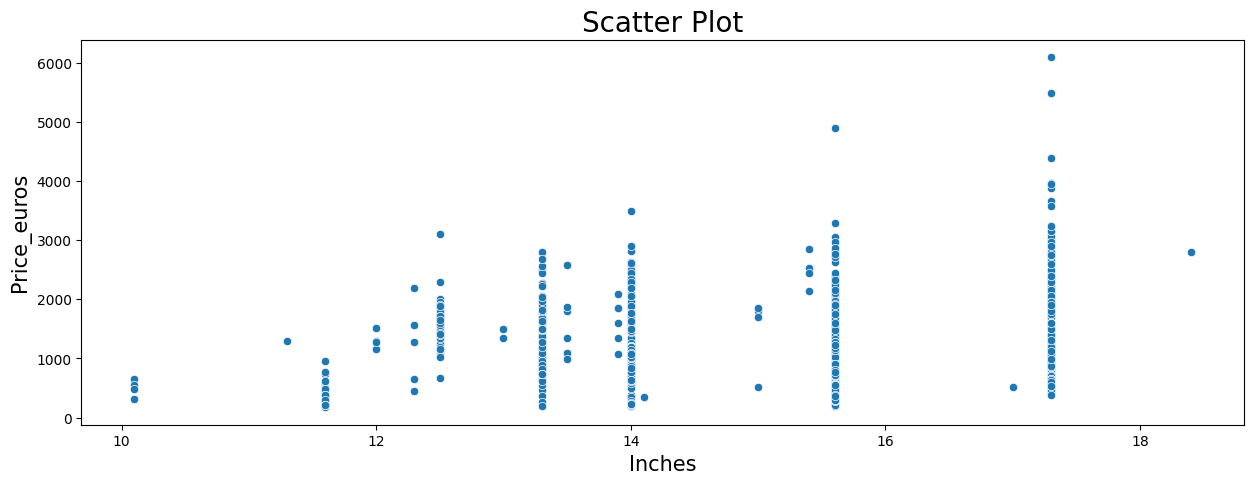

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
sns.scatterplot(data=ds, x="Inches", y="Price_euros",palette = "dark")
plt.title("Scatter Plot",fontsize=20)
plt.xlabel("Inches",fontsize=15)
plt.ylabel("Price_euros",fontsize=15)
plt.show()

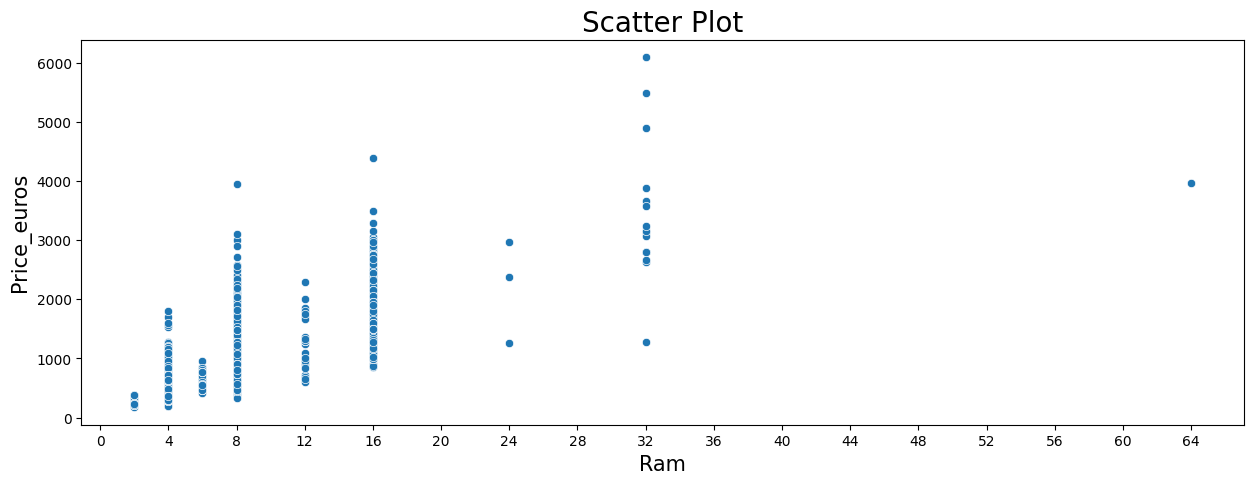

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
sns.scatterplot(data=ds, x="Ram(GB)", y="Price_euros",palette = "dark")
plt.title("Scatter Plot",fontsize=20)
plt.xlabel("Ram",fontsize=15)
plt.ylabel("Price_euros",fontsize=15)

# Встановлення міток осі x кратними 4 або 8
plt.gca().xaxis.set_major_locator(MultipleLocator(4))

plt.show()

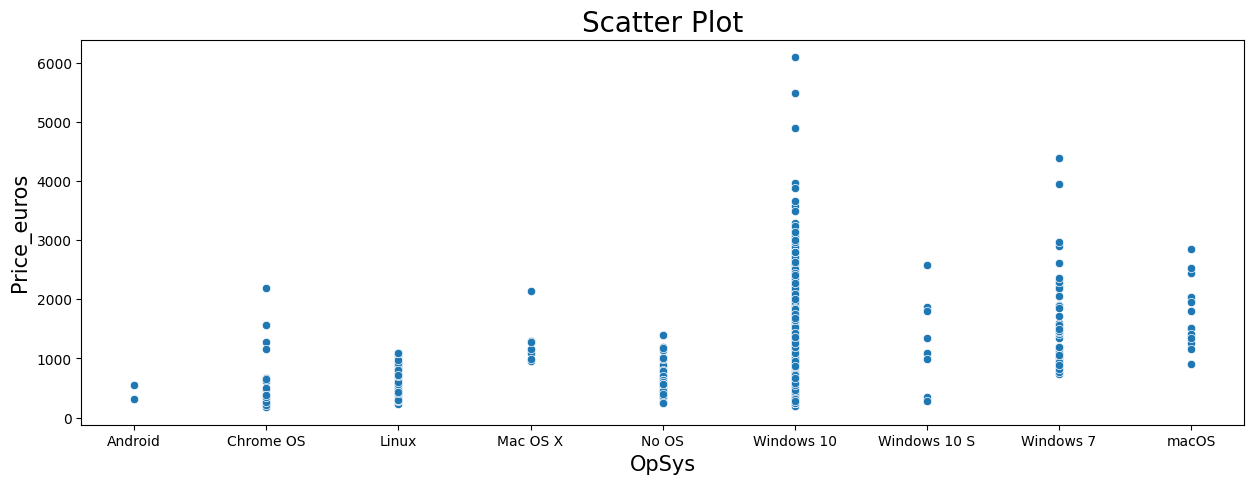

In [ ]:
ds_sorted = ds.sort_values(by='OpSys')
plt.rcParams["figure.figsize"] = (15,5)
sns.scatterplot(data=ds_sorted, x="OpSys", y="Price_euros",palette = "dark")
plt.title("Scatter Plot",fontsize=20)
plt.xlabel("OpSys",fontsize=15)
plt.ylabel("Price_euros",fontsize=15)
plt.show()

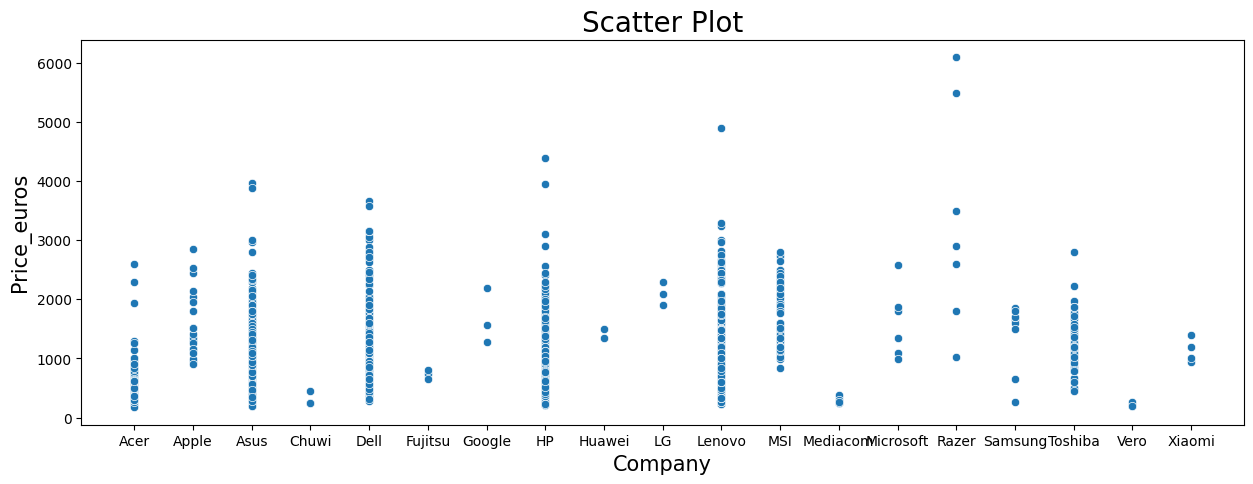

In [ ]:
ds_sorted = ds.sort_values(by='Company')
plt.rcParams["figure.figsize"] = (15,5)
sns.scatterplot(data=ds_sorted, x="Company", y="Price_euros",palette = "dark")
plt.title("Scatter Plot",fontsize=20)
plt.xlabel("Company",fontsize=15)
plt.ylabel("Price_euros",fontsize=15)
plt.show()

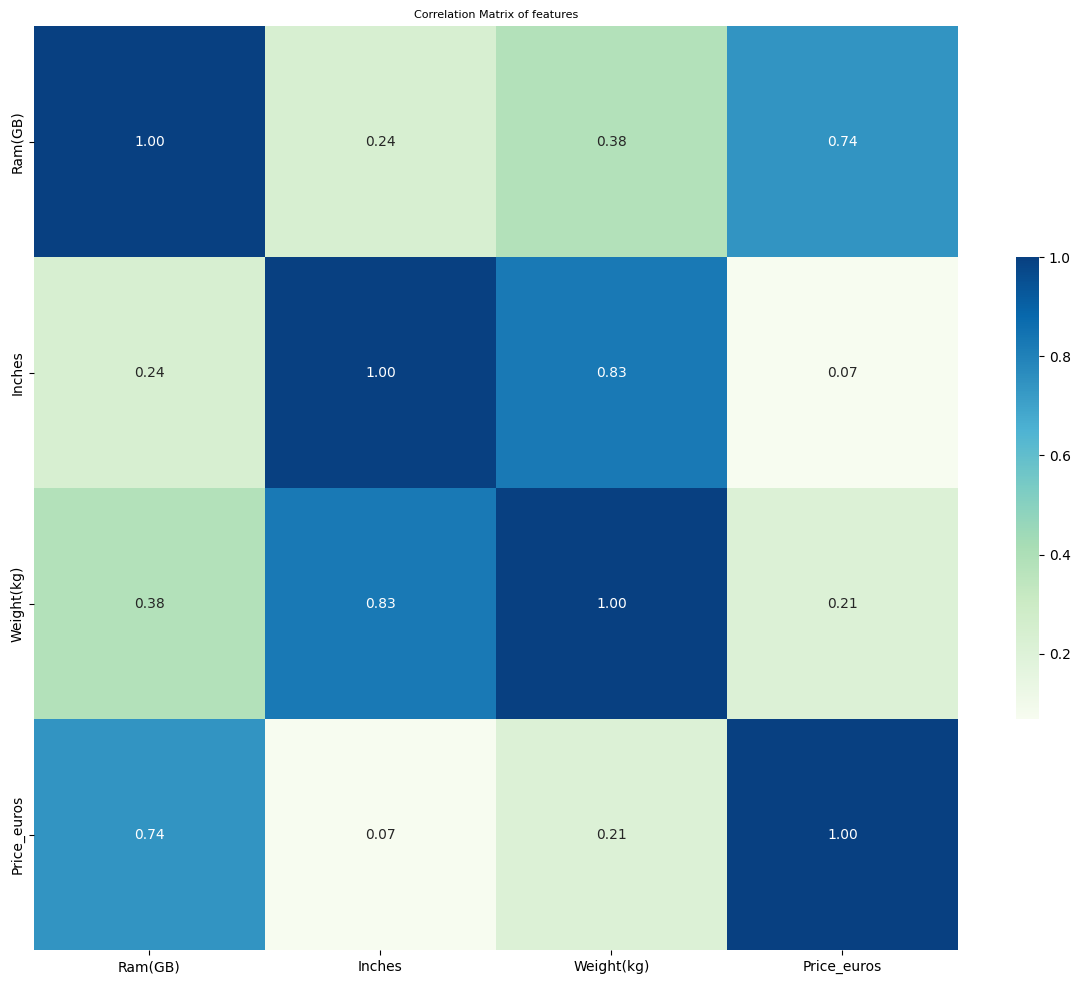

In [ ]:
col_for_corr = ['Ram(GB)',
                'Inches',
                'Weight(kg)',
                'Price_euros']

plt.rcParams["figure.figsize"] = (15,12)
correlation_matrix = ds[col_for_corr].corr()
sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=8)
plt.show()